In [3]:
# Why: import necessary libraries for data manipulation, visualization, and ML
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
data_path = "../data/waterquality/water_potability.csv"
df = pd.read_csv(data_path)
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [8]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [9]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [11]:
df = df.fillna(df.mean())

In [12]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [17]:
# Why: separate features (X) and target (y)
X = df.drop("Potability", axis=1).values
y = df["Potability"].values

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
len(X_train),X_test.shape

(2620, (656, 9))

In [25]:
# Why: neural networks perform better when features are scaled
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
X_train.shape[1]

9

In [28]:
# Why: simple feed-forward network for binary classification
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # sigmoid for binary output
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                640       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2753 (10.75 KB)
Trainable params: 2753 (10.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
# Early stopping to prevent overfitting

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=300,
    batch_size=32,
    verbose=2
)


Epoch 1/300
66/66 - 1s - loss: 0.5167 - accuracy: 0.7419 - val_loss: 0.6017 - val_accuracy: 0.6660 - 827ms/epoch - 13ms/step
Epoch 2/300
66/66 - 1s - loss: 0.5206 - accuracy: 0.7366 - val_loss: 0.6045 - val_accuracy: 0.6756 - 502ms/epoch - 8ms/step
Epoch 3/300
66/66 - 0s - loss: 0.5161 - accuracy: 0.7395 - val_loss: 0.6025 - val_accuracy: 0.6660 - 296ms/epoch - 4ms/step
Epoch 4/300
66/66 - 0s - loss: 0.5054 - accuracy: 0.7533 - val_loss: 0.6062 - val_accuracy: 0.6775 - 272ms/epoch - 4ms/step
Epoch 5/300
66/66 - 0s - loss: 0.5189 - accuracy: 0.7328 - val_loss: 0.6106 - val_accuracy: 0.6622 - 305ms/epoch - 5ms/step
Epoch 6/300
66/66 - 0s - loss: 0.5183 - accuracy: 0.7457 - val_loss: 0.6106 - val_accuracy: 0.6679 - 419ms/epoch - 6ms/step
Epoch 7/300
66/66 - 0s - loss: 0.5218 - accuracy: 0.7357 - val_loss: 0.6103 - val_accuracy: 0.6641 - 444ms/epoch - 7ms/step
Epoch 8/300
66/66 - 0s - loss: 0.5210 - accuracy: 0.7347 - val_loss: 0.6117 - val_accuracy: 0.6622 - 290ms/epoch - 4ms/step
Epoch 9

In [36]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

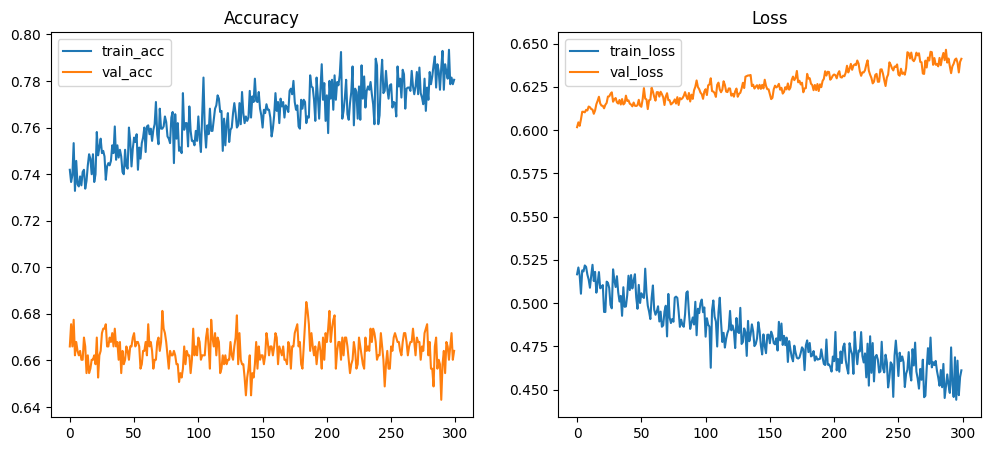

In [38]:
# Why: visualize accuracy and loss to check overfitting
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss')
plt.legend()

plt.show()

In [39]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")

21/21 [==============================] - 0s 7ms/step - loss: 0.6730 - accuracy: 0.6570
Test Loss: 0.6730, Test Accuracy: 0.6570


21/21 [==============================] - 0s 7ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.76      0.74       412
           1       0.54      0.48      0.51       244

    accuracy                           0.66       656
   macro avg       0.63      0.62      0.62       656
weighted avg       0.65      0.66      0.65       656



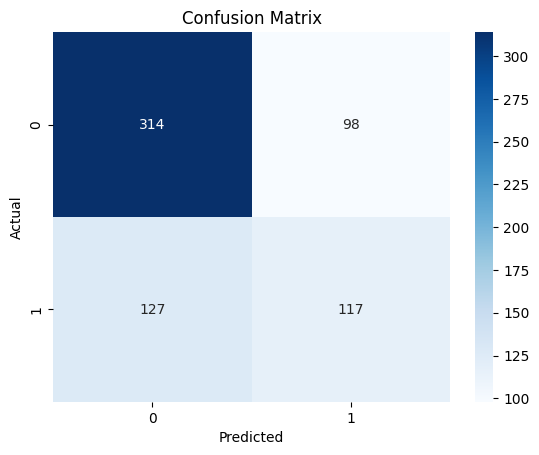

In [42]:
y_pred = (model.predict(X_test) > 0.5).astype(int)

print("Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [43]:
# Why: later we can load this model in FastAPI for prediction
model.save("../saved_models/water_quality_model")


INFO:tensorflow:Assets written to: ../saved_models/water_quality_model\assets


INFO:tensorflow:Assets written to: ../saved_models/water_quality_model\assets


In [44]:
sample = np.array([[7.0, 200, 30000, 7.5, 350, 500, 10, 50, 2]])  # shape must match features
sample_scaled = scaler.transform(sample)
pred = model.predict(sample_scaled)[0][0]
label = "Potable" if pred > 0.5 else "Not Potable"
print(f"Prediction: {label}, Confidence: {pred:.4f}")

1/1 [==============================] - 0s 204ms/step
Prediction: Not Potable, Confidence: 0.1499


In [47]:
import joblib
joblib.dump(scaler, "../saved_models/water_scaler.pkl")

['../saved_models/water_scaler.pkl']